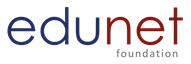

# Edunet Foundation : Class Room Exercises

# Lab:  Missing Values Treatment

### Objective:

The objective of the "Missing Values Treatment by Pandas" lab is to provide learners with practical skills to handle and treat missing data in datasets using the Pandas library in Python. The lab begins with an introduction to the challenges posed by missing data and the importance of proper data cleaning. Learners will gain hands-on experience in identifying missing values, using techniques such as imputation, deletion, and interpolation to handle these gaps. The lab will also cover the use of Pandas functions for detecting and filling missing values, as well as strategies for deciding the best treatment method based on the context and nature of the data. By the end of the lab, learners will be proficient in managing missing data, ensuring the quality and integrity of their datasets for accurate analysis.

#### Step 1 Identifying Missing Values:

Before addressing missing values, it's crucial to identify where they exist in your dataset. In pandas, missing values are typically represented as NaN (Not a Number) or None.

In [2]:
import pandas as pd
import numpy as np

# Creating a sample dataset with missing values
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eve'],
    'Age': [24, np.nan, 22, 32, np.nan],
    'Gender': ['F', 'M', 'M', np.nan, 'F'],
    'Salary': [50000, 54000, np.nan, 60000, 58000]
}

df = pd.DataFrame(data)
print("Original Dataset:\n")
df


Original Dataset:



,Name,Age,Gender,Salary
0,Alice,24.0,F,50000.0
1,Bob,NaN,M,54000.0
2,Charlie,22.0,M,NaN
3,David,32.0,NaN,60000.0
4,Eve,NaN,F,58000.0


### 1. Removing Missing Values

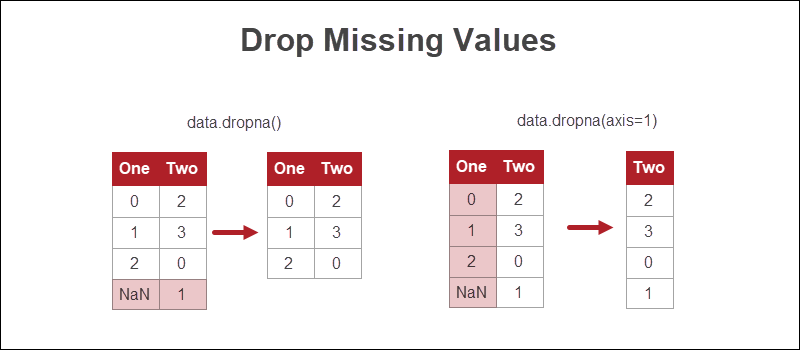


* Method 1: Remove Rows with Missing Values

In [3]:
# Removing rows with any missing values
df_dropped_rows = df.dropna()
print("\nDataset after dropping rows with missing values:\n", df_dropped_rows)


Dataset after dropping rows with missing values:
     Name   Age Gender   Salary
0  Alice  24.0      F  50000.0


* Method 2: Remove Columns with Missing Values

In [4]:
# Removing columns with any missing values
df_dropped_columns = df.dropna(axis=1)
print("\nDataset after dropping columns with missing values:\n", df_dropped_columns)



Dataset after dropping columns with missing values:
       Name
0    Alice
1      Bob
2  Charlie
3    David
4      Eve


### 2. Imputing Missing Values

##### Method 3: Impute with Mean/Median/Mode
* Mean: Suitable for numerical data.
* Median: Suitable for numerical data, especially when outliers are present.
* Mode: Suitable for categorical data.

In [5]:
# Impute numerical missing values with mean
df_mean_imputed = df.copy()
df_mean_imputed['Age'] = df_mean_imputed['Age'].fillna(df_mean_imputed['Age'].mean())
df_mean_imputed['Salary'] = df_mean_imputed['Salary'].fillna(df_mean_imputed['Salary'].mean())

# Impute categorical missing values with mode
df_mean_imputed['Gender'] = df_mean_imputed['Gender'].fillna(df_mean_imputed['Gender'].mode()[0])

print("\nDataset after mean/mode imputation:\n", df_mean_imputed)


Dataset after mean/mode imputation:
       Name   Age Gender   Salary
0    Alice  24.0      F  50000.0
1      Bob  26.0      M  54000.0
2  Charlie  22.0      M  55500.0
3    David  32.0      F  60000.0
4      Eve  26.0      F  58000.0


#### Method 4: Impute with Forward/Backward Fill
* Forward Fill (ffill): Fill missing values with the previous value in the column.
* Backward Fill (bfill): Fill missing values with the next value in the column.

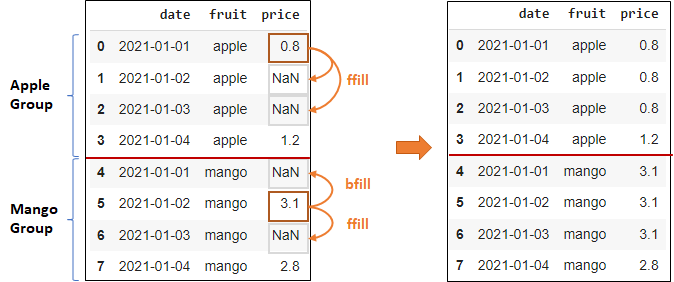

In [6]:
# Impute missing values with forward fill
df_ffill = df.copy()
df_ffill.fillna(method='ffill', inplace=True)

print("\nDataset after forward fill (ffill):\n", df_ffill)

# Impute missing values with backward fill
df_bfill = df.copy()
df_bfill.fillna(method='bfill', inplace=True)

print("\nDataset after backward fill (bfill):\n", df_bfill)



Dataset after forward fill (ffill):
       Name   Age Gender   Salary
0    Alice  24.0      F  50000.0
1      Bob  24.0      M  54000.0
2  Charlie  22.0      M  54000.0
3    David  32.0      M  60000.0
4      Eve  32.0      F  58000.0

Dataset after backward fill (bfill):
       Name   Age Gender   Salary
0    Alice  24.0      F  50000.0
1      Bob  22.0      M  54000.0
2  Charlie  22.0      M  60000.0
3    David  32.0      F  60000.0
4      Eve   NaN      F  58000.0


### 3. Imputation Using Specific Values

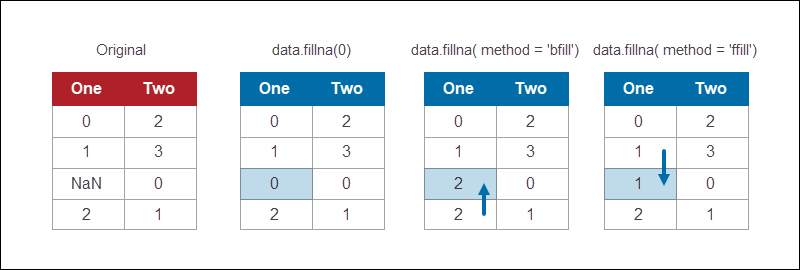

* Method 5: Impute with a Specific Value (e.g., 0, 'Unknown')

In [7]:
# Impute missing values with a specific value
df_specific_impute = df.copy()
df_specific_impute['Age'] = df_specific_impute['Age'].fillna(0)
df_specific_impute['Gender'] = df_specific_impute['Gender'].fillna('Unknown')
df_specific_impute['Salary'] = df_specific_impute['Salary'].fillna(0)

print("\nDataset after imputation with specific values:\n", df_specific_impute)



Dataset after imputation with specific values:
       Name   Age   Gender   Salary
0    Alice  24.0        F  50000.0
1      Bob   0.0        M  54000.0
2  Charlie  22.0        M      0.0
3    David  32.0  Unknown  60000.0
4      Eve   0.0        F  58000.0
